In [1]:
! pip install -q scikit-plot

# **Import**

In [2]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
import string

In [3]:
import sys
filePath = '/Users/pratiksayanekar/Documents/DL_20200161'
#filePath = '/content/drive/My Drive/DeepLearning'
sys.path.append(filePath)

In [4]:
from utils.basic_utilities import Utils
from models.LSTM_1 import LSTM_Model
from models.CNN_1 import CNN_Model
from models.Word2Vec_1 import Word2VecModel
from models.BiLSTM import BiLSTM_Model

/Users/pratiksayanekar/opt/anaconda3/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [5]:
from sklearn.metrics import classification_report

# **Reading Preprocessed Data**

In [6]:
#df = pd.read_csv('/content/drive/MyDrive/DeepLearning/Data/preprocessed_data.csv')
df = pd.read_csv('{}/Data/preprocessed_data.csv'.format(filePath))
df.head()

,emotion,content,original_content,text
0,disappointed,oh fuck did i wrote fil grinningfacewithsweat nsorry spot disappointedface,b'RT @Davbingodav: @mcrackins Oh fuck.... did I wrote Fil ??? :grinning_face_with_sweat:\nSorry Spot. :disappointed_face:',rt oh fuck wrote fil grinning_face_with_sweatnsorry spot isappointed_face
1,disappointed,i feel nor am i shamed by it,i feel nor am i shamed by it,feel shamed
2,disappointed,i had been feeling a little bit defeated by the step of faith we would need to take to try to resolve our problem,i had been feeling a little bit defeated by the steps of faith we would need to take to try to resolve our problem,feeling little bit defeated steps faith need try resolve problem
3,happy,imagine if that reaction guy that called jj kfc saw this my man would ve started cry lmao,"b""@KSIOlajidebt imagine if that reaction guy that called JJ KFC saw this. my man would've started crying lmao """,imagine reaction guy called jj kfc saw man ve started crying lmao
4,disappointed,i wouldnt feel burdened so that i would live my life a a testament to his sacrifice that wa out of a love so pure and innocent yet so great and mighty,i wouldnt feel burdened so that i would live my life as a testament to his sacrifice that was out of a love so pure and innocent yet so great and mighty,wouldnt feel burdened live life testament sacrifice love pure innocent great mighty


In [7]:
df.text = df.text.astype(str)

# **Splitting dataset into train(80%) and test(20%)**

In [8]:
util = Utils()
X_train, X_test, y_train, y_test = util.split_data(df)
print("The shape of train data: ",X_train.shape)
print("The shape of train target: ",y_train.shape)
print("The shape of test data: ",X_test.shape)
print("The shape of test target: ",y_test.shape)

Initialization of Utilities...
The shape of train data:  (824917,)
The shape of train target:  (824917,)
The shape of test data:  (91658,)
The shape of test target:  (91658,)


# **Tokenization and Padding of each tweet**

In [9]:
max_len = util.max_len(df)
print("Maximum length of tweet:", max_len)

Maximum length of tweet: 122


In [10]:
train_converted, test_converted = util.tokenization_padding(X_train, X_test, max_len)
print("After Tokenization and Padding...")
print("The shape of train data: ", train_converted.shape)
print("The shape of test data: ", test_converted.shape)

After Tokenization and Padding...
The shape of train data:  (824917, 122)
The shape of test data:  (91658, 122)


In [11]:
target_converted_train, target_converted_test = util.one_hot_target_variable(y_train, y_test)
print("After one hot encoding of target variable...")
print("The shape of train target: ", target_converted_train.shape)
print("The shape of test target: ", target_converted_test.shape)

After one hot encoding of target variable...
The shape of train target:  (824917, 3)
The shape of test target:  (91658, 3)


# **Deep Learning Models**

In [12]:
EPOCH = 10
BATCH_SIZE = 1024

# **CNN Model**

In [13]:
cnn = CNN_Model()
model = cnn.create_model(embed_dim = 100, num_filters = 128, 
                          input_len = train_converted.shape[1], feature = 200000, 
                          drop_out = 0.8, num_words=4)
model.summary()

CNN Model Initialization...
Model Created Successfully...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 122, 100)          20000000  
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 122, 100)          0         
_________________________________________________________________
conv1d (Conv1D)              (None, 119, 128)          51328     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 3)                 387       
Total params: 20,051,715
Trainable params: 20,051,715
Non-trainable params: 0
_________________________________________________________________


In [14]:
history = model.fit(train_converted, target_converted_train, epochs = EPOCH, 
                    batch_size=BATCH_SIZE, validation_split=0.1,
                    callbacks=cnn.callbacks)

Epoch 1/10
726/726 [==============================] - 240s 330ms/step - loss: 0.5096 - acc: 0.7712 - val_loss: 0.2483 - val_acc: 0.8921

Epoch 00001: val_loss improved from inf to 0.24835, saving model to /Users/pratiksayanekar/Documents/DL_20200161/checkpoints/CNN/
INFO:tensorflow:Assets written to: /Users/pratiksayanekar/Documents/DL_20200161/checkpoints/CNN/assets
Epoch 2/10
726/726 [==============================] - 240s 331ms/step - loss: 0.2513 - acc: 0.8956 - val_loss: 0.2373 - val_acc: 0.8980

Epoch 00002: val_loss improved from 0.24835 to 0.23726, saving model to /Users/pratiksayanekar/Documents/DL_20200161/checkpoints/CNN/
INFO:tensorflow:Assets written to: /Users/pratiksayanekar/Documents/DL_20200161/checkpoints/CNN/assets
Epoch 3/10
726/726 [==============================] - 241s 332ms/step - loss: 0.2319 - acc: 0.9044 - val_loss: 0.2336 - val_acc: 0.8989

Epoch 00003: val_loss improved from 0.23726 to 0.23363, saving model to /Users/pratiksayanekar/Documents/DL_20200161/ch

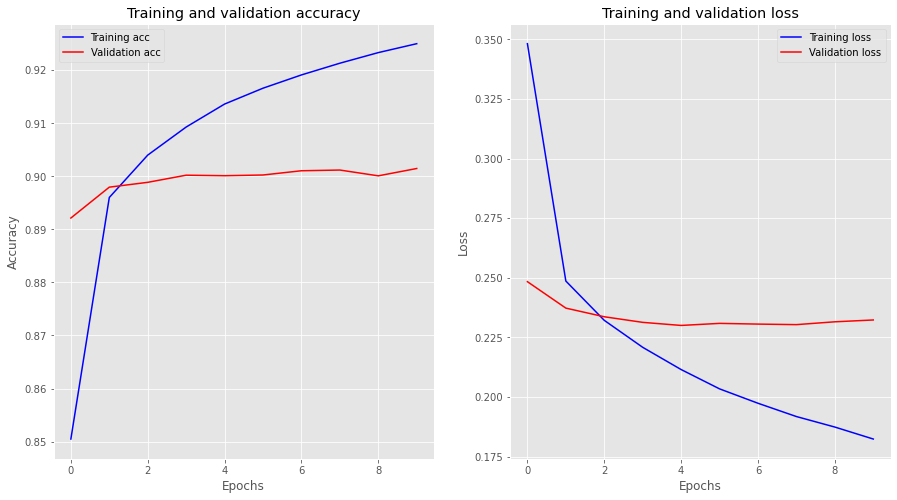

In [15]:
util.plot_accuracy_loss(history, 'CNN')

# **Evaluation**

In [16]:
model = cnn.load_saved_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 122, 100)          20000000  
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 122, 100)          0         
_________________________________________________________________
conv1d (Conv1D)              (None, 119, 128)          51328     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 3)                 387       
Total params: 20,051,715
Trainable params: 20,051,715
Non-trainable params: 0
_________________________________________________________________


In [17]:
score, acc = model.evaluate(test_converted, target_converted_test, verbose = 2, batch_size = BATCH_SIZE)
print("The loss of this model: %.2f" % (score))
print("The accuracy of this model: %.2f" % (acc))

90/90 - 5s - loss: 0.2272 - acc: 0.9012
The loss of this model: 0.23
The accuracy of this model: 0.90


In [18]:
y_pred = model.predict(test_converted)

Confusion Matrix: 
 [[26969  3704  1107]
 [ 2866 27295   743]
 [  264   373 28337]]


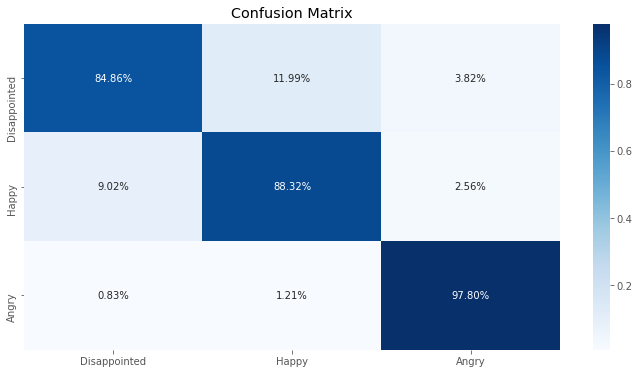

In [19]:
test,pred = util.plot_confusion_matrix(y_pred, target_converted_test, 'CNN')

In [20]:
print("Classification Report: ", classification_report(test, pred))

Classification Report:                precision    recall  f1-score   support

           0       0.90      0.85      0.87     31780
           1       0.87      0.88      0.88     30904
           2       0.94      0.98      0.96     28974

    accuracy                           0.90     91658
   macro avg       0.90      0.90      0.90     91658
weighted avg       0.90      0.90      0.90     91658



# **CNN_v2**

In [23]:
cnn = CNN_Model()
model = cnn.create_model_v2(embed_dim = 100, num_filters = 128, 
                          input_len = train_converted.shape[1], feature = 200000, 
                          drop_out = 0.8, num_words=4)
model.summary()

CNN Model Initialization...
Model Created Successfully...
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 122, 100)          20000000  
_________________________________________________________________
spatial_dropout1d_3 (Spatial (None, 122, 100)          0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 122, 128)          51328     
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 122, 128)          65664     
_________________________________________________________________
spatial_dropout1d_4 (Spatial (None, 122, 128)          0         
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 128)               0         
______________________________________________________________

In [24]:
history = model.fit(train_converted, target_converted_train, epochs = EPOCH, 
                    batch_size=BATCH_SIZE, validation_split=0.1,
                    callbacks=cnn.callbacks_v2)

Epoch 1/10
726/726 [==============================] - 412s 567ms/step - loss: 0.5862 - acc: 0.7078 - val_loss: 0.2531 - val_acc: 0.8868

Epoch 00001: val_loss improved from inf to 0.25305, saving model to /Users/pratiksayanekar/Documents/DL_20200161/checkpoints/CNN_v2/
INFO:tensorflow:Assets written to: /Users/pratiksayanekar/Documents/DL_20200161/checkpoints/CNN_v2/assets
Epoch 2/10
726/726 [==============================] - 413s 569ms/step - loss: 0.2701 - acc: 0.8851 - val_loss: 0.2541 - val_acc: 0.8923

Epoch 00002: val_loss did not improve from 0.25305
Epoch 3/10
726/726 [==============================] - 424s 584ms/step - loss: 0.2482 - acc: 0.8937 - val_loss: 0.2523 - val_acc: 0.8958

Epoch 00003: val_loss improved from 0.25305 to 0.25233, saving model to /Users/pratiksayanekar/Documents/DL_20200161/checkpoints/CNN_v2/
INFO:tensorflow:Assets written to: /Users/pratiksayanekar/Documents/DL_20200161/checkpoints/CNN_v2/assets
Epoch 4/10
726/726 [==============================] - 41

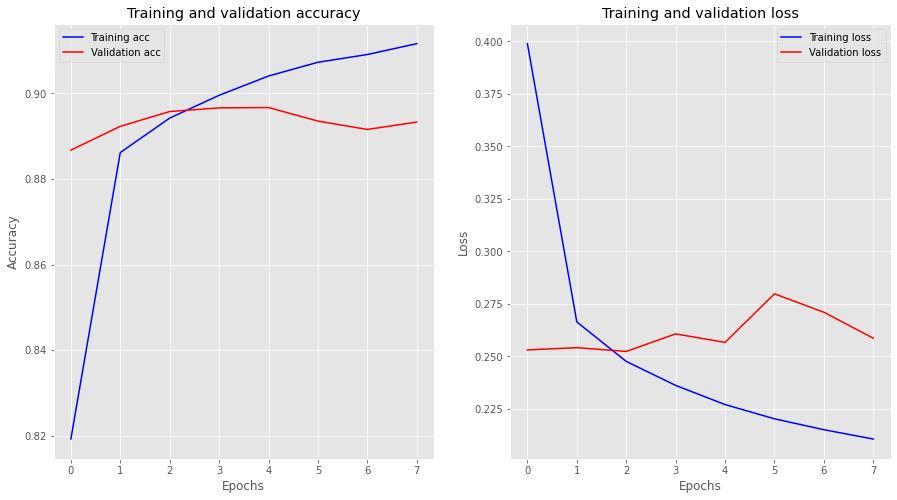

In [25]:
util.plot_accuracy_loss(history, 'CNN_v2')

# **Evaluation**

In [26]:
model = cnn.load_saved_model_v2()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 122, 100)          20000000  
_________________________________________________________________
spatial_dropout1d_3 (Spatial (None, 122, 100)          0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 122, 128)          51328     
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 122, 128)          65664     
_________________________________________________________________
spatial_dropout1d_4 (Spatial (None, 122, 128)          0         
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)               

In [27]:
score, acc = model.evaluate(test_converted, target_converted_test, verbose = 2, batch_size = BATCH_SIZE)
print("The loss of this model: %.2f" % (score))
print("The accuracy of this model: %.2f" % (acc))

90/90 - 13s - loss: 0.2511 - acc: 0.8969
The loss of this model: 0.25
The accuracy of this model: 0.90


In [28]:
y_pred = model.predict(test_converted)

Confusion Matrix: 
 [[27330  4196  1390]
 [ 2644 26703   619]
 [  125   473 28178]]


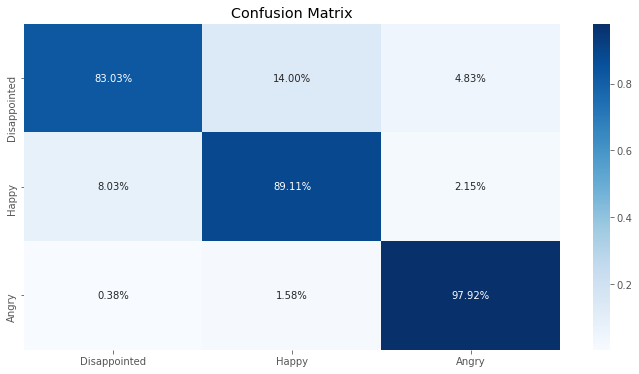

In [29]:
test,pred = util.plot_confusion_matrix(y_pred, target_converted_test, 'CNN_v2')

In [30]:
print("Classification Report: ", classification_report(test, pred))

Classification Report:                precision    recall  f1-score   support

           0       0.91      0.83      0.87     32916
           1       0.85      0.89      0.87     29966
           2       0.93      0.98      0.96     28776

    accuracy                           0.90     91658
   macro avg       0.90      0.90      0.90     91658
weighted avg       0.90      0.90      0.90     91658



# **LSTM Model**

In [31]:
lstm = LSTM_Model()
model = lstm.create_model(embed_dim = 100, lstm_out = 64, 
                          input_len = train_converted.shape[1], feature = 200000, 
                          drop_out = 0.8)
model.summary()

LSTM Model Initialization...
Model Created Successfully...
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 122, 100)          20000000  
_________________________________________________________________
spatial_dropout1d_5 (Spatial (None, 122, 100)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 64)                42240     
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 195       
Total params: 20,042,435
Trainable params: 20,042,435
Non-trainable params: 0
_________________________________________________________________


In [32]:
history = model.fit(train_converted, target_converted_train, epochs = EPOCH, 
                    batch_size= BATCH_SIZE, validation_split=0.1,
                    callbacks=lstm.callbacks)

Epoch 1/10
726/726 [==============================] - 772s 1s/step - loss: 0.7204 - acc: 0.6545 - val_loss: 0.2797 - val_acc: 0.8810

Epoch 00001: val_loss improved from inf to 0.27967, saving model to /Users/pratiksayanekar/Documents/DL_20200161/checkpoints/LSTM/
INFO:tensorflow:Assets written to: /Users/pratiksayanekar/Documents/DL_20200161/checkpoints/LSTM/assets
Epoch 2/10
726/726 [==============================] - 739s 1s/step - loss: 0.3529 - acc: 0.8555 - val_loss: 0.2664 - val_acc: 0.8849

Epoch 00002: val_loss improved from 0.27967 to 0.26645, saving model to /Users/pratiksayanekar/Documents/DL_20200161/checkpoints/LSTM/
INFO:tensorflow:Assets written to: /Users/pratiksayanekar/Documents/DL_20200161/checkpoints/LSTM/assets
Epoch 3/10
726/726 [==============================] - 772s 1s/step - loss: 0.3121 - acc: 0.8723 - val_loss: 0.2603 - val_acc: 0.8891

Epoch 00003: val_loss improved from 0.26645 to 0.26027, saving model to /Users/pratiksayanekar/Documents/DL_20200161/checkpo

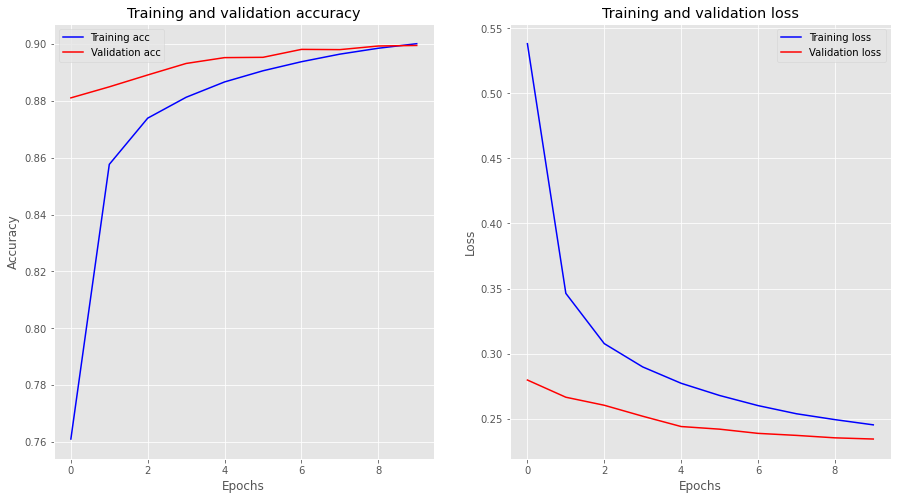

In [33]:
util.plot_accuracy_loss(history, 'LSTM')

# **Evaluation**

In [34]:
model = lstm.load_saved_model()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 122, 100)          20000000  
_________________________________________________________________
spatial_dropout1d_5 (Spatial (None, 122, 100)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 64)                42240     
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 195       
Total params: 20,042,435
Trainable params: 20,042,435
Non-trainable params: 0
_________________________________________________________________


In [35]:
score, acc = model.evaluate(test_converted, target_converted_test, verbose = 2, batch_size = BATCH_SIZE)
print("The loss of this model: %.2f" % (score))
print("The accuracy of this model: %.2f" % (acc))

90/90 - 15s - loss: 0.2312 - acc: 0.8998
The loss of this model: 0.23
The accuracy of this model: 0.90


In [36]:
y_pred = model.predict(test_converted)

Confusion Matrix: 
 [[27354  4130  1284]
 [ 2572 26912   699]
 [  173   330 28204]]


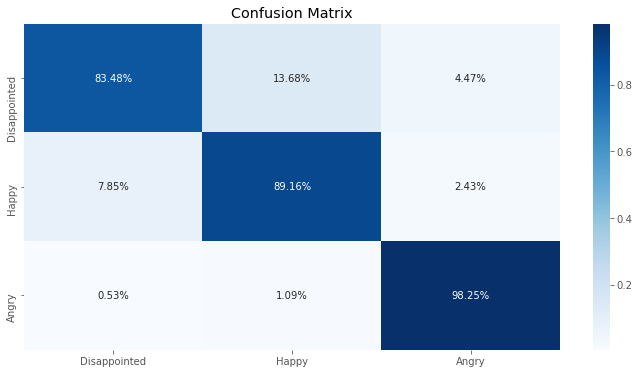

In [37]:
test, pred = util.plot_confusion_matrix(y_pred, target_converted_test, 'LSTM')

In [38]:
print("Classification Report: ", classification_report(test, pred))

Classification Report:                precision    recall  f1-score   support

           0       0.91      0.83      0.87     32768
           1       0.86      0.89      0.87     30183
           2       0.93      0.98      0.96     28707

    accuracy                           0.90     91658
   macro avg       0.90      0.90      0.90     91658
weighted avg       0.90      0.90      0.90     91658



# **LSTM_v2**

In [39]:
lstm = LSTM_Model()
model = lstm.create_model_v2(embed_dim = 100, lstm_out = 64, 
                          input_len = train_converted.shape[1], feature = 200000, 
                          drop_out = 0.8)
model.summary()

LSTM Model Initialization...
Model Created Successfully...
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 122, 100)          20000000  
_________________________________________________________________
spatial_dropout1d_6 (Spatial (None, 122, 100)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 122, 64)           42240     
_________________________________________________________________
spatial_dropout1d_7 (Spatial (None, 122, 64)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 122, 64)           33024     
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 64)                0         
_____________________________________________________________

In [40]:
history = model.fit(train_converted, target_converted_train, epochs = EPOCH, 
                    batch_size= BATCH_SIZE, validation_split=0.1,
                    callbacks=lstm.callbacks_v2)

Epoch 1/10
726/726 [==============================] - 1238s 2s/step - loss: 0.9520 - acc: 0.4667 - val_loss: 0.4600 - val_acc: 0.8192

Epoch 00001: val_loss improved from inf to 0.45997, saving model to /Users/pratiksayanekar/Documents/DL_20200161/checkpoints/LSTM_v2/
INFO:tensorflow:Assets written to: /Users/pratiksayanekar/Documents/DL_20200161/checkpoints/LSTM_v2/assets
Epoch 2/10
726/726 [==============================] - 1204s 2s/step - loss: 0.5663 - acc: 0.7496 - val_loss: 0.3926 - val_acc: 0.8489

Epoch 00002: val_loss improved from 0.45997 to 0.39259, saving model to /Users/pratiksayanekar/Documents/DL_20200161/checkpoints/LSTM_v2/
INFO:tensorflow:Assets written to: /Users/pratiksayanekar/Documents/DL_20200161/checkpoints/LSTM_v2/assets
Epoch 3/10
726/726 [==============================] - 1185s 2s/step - loss: 0.5018 - acc: 0.7889 - val_loss: 0.3725 - val_acc: 0.8588

Epoch 00003: val_loss improved from 0.39259 to 0.37254, saving model to /Users/pratiksayanekar/Documents/DL_2

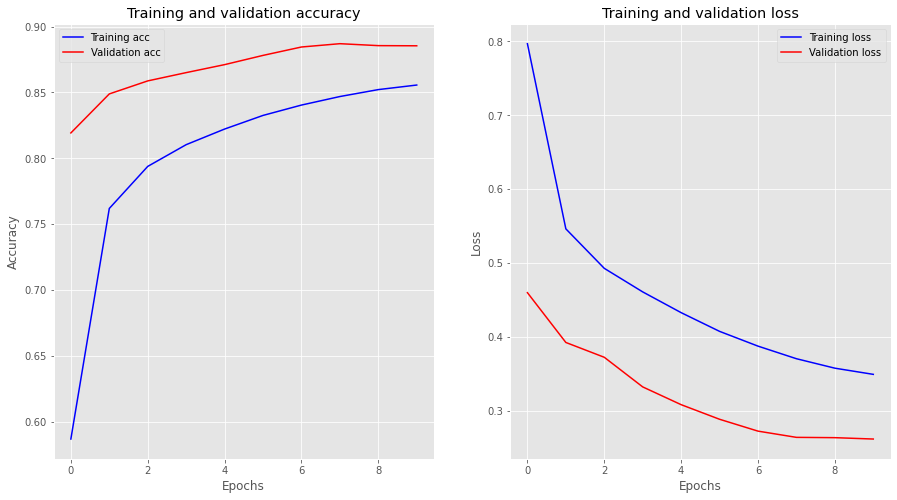

In [41]:
util.plot_accuracy_loss(history, 'LSTM_v2')

# **Evaluation**

In [42]:
model = lstm.load_saved_model_v2()
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 122, 100)          20000000  
_________________________________________________________________
spatial_dropout1d_6 (Spatial (None, 122, 100)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 122, 64)           42240     
_________________________________________________________________
spatial_dropout1d_7 (Spatial (None, 122, 64)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 122, 64)           33024     
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)               

In [43]:
score, acc = model.evaluate(test_converted, target_converted_test, verbose = 2, batch_size = BATCH_SIZE)
print("The loss of this model: %.2f" % (score))
print("The accuracy of this model: %.2f" % (acc))

90/90 - 25s - loss: 0.2567 - acc: 0.8889
The loss of this model: 0.26
The accuracy of this model: 0.89


In [44]:
y_pred = model.predict(test_converted)

Confusion Matrix: 
 [[25168  2688   911]
 [ 4712 28246  1219]
 [  219   438 28057]]


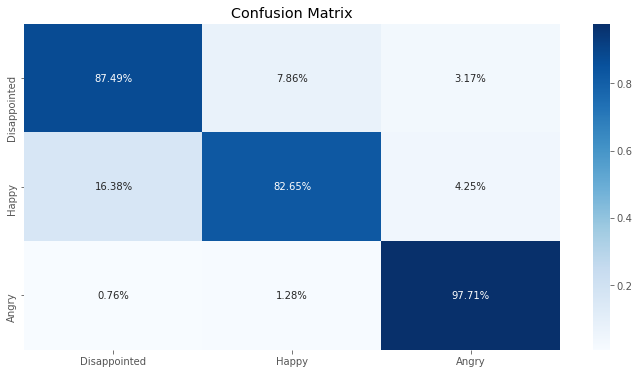

In [45]:
test, pred = util.plot_confusion_matrix(y_pred, target_converted_test, 'LSTM_v2')

In [46]:
print("Classification Report: ", classification_report(test, pred))

Classification Report:                precision    recall  f1-score   support

           0       0.84      0.87      0.86     28767
           1       0.90      0.83      0.86     34177
           2       0.93      0.98      0.95     28714

    accuracy                           0.89     91658
   macro avg       0.89      0.89      0.89     91658
weighted avg       0.89      0.89      0.89     91658



# **Word2Vec Model**

In [52]:
word2vec = Word2VecModel()
# word2vec_model = word2vec.create_model(X_train)

# I have created a seperate class for word2vec model which has functions to create model and embedding matrix, 
# and it was working perfectly fine until I moved to local machine from colab.
# There was some version mismatch issue, 
# please refer, https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4
# so I have created below additional method which will return the word2vec model.

Word2Vec Model Initialization...


In [53]:
import numpy as np
from gensim.models import Word2Vec

Embedding_dimensions = 100
def create_word2vec_model(X_train):
    # Creating Word2Vec training dataset.
    Word2vec_train_data = list(map(lambda x: x.split(), X_train))

    word2vec_model = Word2Vec(sentences = Word2vec_train_data, vector_size=Embedding_dimensions,min_count=5)

    print("Vocabulary Length:", len(word2vec_model.wv))
    return word2vec_model

In [54]:

word2vec_model = create_word2vec_model(X_train)

Vocabulary Length: 37148


In [55]:
train_converted, test_converted, tokenizer = util.tokenization_padding_oov_token(X_train, X_test, 60)
print("After Tokenization and Padding...")
print("The shape of train data: ", train_converted.shape)
print("The shape of test data: ", test_converted.shape)

After Tokenization and Padding...
The shape of train data:  (824917, 60)
The shape of test data:  (91658, 60)


In [56]:
vocab_length = len(tokenizer.word_index) + 1
embedding_matrix = word2vec.create_embedding_matrix(vocab_length, tokenizer, word2vec_model)

Embedding Matrix Shape: (170216, 100)


# **BiLSTM**

In [57]:
bi_lstm = BiLSTM_Model()
model = bi_lstm.create_model(embed_dim = 100, lstm_out = 100, input_len = train_converted.shape[1], 
                             feature = vocab_length, drop_out = 0.8, embedding_matrix = embedding_matrix)
model.summary()

BiLSTM Model Initialization...
Model Created Successfully...
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 60, 100)           17021600  
_________________________________________________________________
bidirectional (Bidirectional (None, 60, 200)           160800    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 60, 200)           240800    
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 56, 100)           100100    
_________________________________________________________________
global_max_pooling1d_4 (Glob (None, 100)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 16)                1616      
___________________________________________________________

In [58]:
history = model.fit(train_converted, target_converted_train, batch_size=BATCH_SIZE, epochs=EPOCH,
                    validation_split=0.1, callbacks=bi_lstm.callbacks, verbose=1)

Epoch 1/10
726/726 [==============================] - 1385s 2s/step - loss: 0.6345 - acc: 0.7161 - val_loss: 0.3186 - val_acc: 0.8646

Epoch 00001: val_loss improved from inf to 0.31863, saving model to /Users/pratiksayanekar/Documents/DL_20200161/checkpoints/BiLSTM/


INFO:tensorflow:Assets written to: /Users/pratiksayanekar/Documents/DL_20200161/checkpoints/BiLSTM/assets


INFO:tensorflow:Assets written to: /Users/pratiksayanekar/Documents/DL_20200161/checkpoints/BiLSTM/assets


Epoch 2/10
726/726 [==============================] - 1409s 2s/step - loss: 0.4468 - acc: 0.8059 - val_loss: 0.3121 - val_acc: 0.8692

Epoch 00002: val_loss improved from 0.31863 to 0.31206, saving model to /Users/pratiksayanekar/Documents/DL_20200161/checkpoints/BiLSTM/


INFO:tensorflow:Assets written to: /Users/pratiksayanekar/Documents/DL_20200161/checkpoints/BiLSTM/assets


INFO:tensorflow:Assets written to: /Users/pratiksayanekar/Documents/DL_20200161/checkpoints/BiLSTM/assets


Epoch 3/10
726/726 [==============================] - 1411s 2s/step - loss: 0.4240 - acc: 0.8154 - val_loss: 0.2892 - val_acc: 0.8794

Epoch 00003: val_loss improved from 0.31206 to 0.28920, saving model to /Users/pratiksayanekar/Documents/DL_20200161/checkpoints/BiLSTM/


INFO:tensorflow:Assets written to: /Users/pratiksayanekar/Documents/DL_20200161/checkpoints/BiLSTM/assets


INFO:tensorflow:Assets written to: /Users/pratiksayanekar/Documents/DL_20200161/checkpoints/BiLSTM/assets


Epoch 4/10
726/726 [==============================] - 1439s 2s/step - loss: 0.4077 - acc: 0.8223 - val_loss: 0.2794 - val_acc: 0.8793

Epoch 00004: val_loss improved from 0.28920 to 0.27941, saving model to /Users/pratiksayanekar/Documents/DL_20200161/checkpoints/BiLSTM/


INFO:tensorflow:Assets written to: /Users/pratiksayanekar/Documents/DL_20200161/checkpoints/BiLSTM/assets


INFO:tensorflow:Assets written to: /Users/pratiksayanekar/Documents/DL_20200161/checkpoints/BiLSTM/assets


Epoch 5/10
726/726 [==============================] - 1452s 2s/step - loss: 0.3947 - acc: 0.8281 - val_loss: 0.2724 - val_acc: 0.8835

Epoch 00005: val_loss improved from 0.27941 to 0.27243, saving model to /Users/pratiksayanekar/Documents/DL_20200161/checkpoints/BiLSTM/


INFO:tensorflow:Assets written to: /Users/pratiksayanekar/Documents/DL_20200161/checkpoints/BiLSTM/assets


INFO:tensorflow:Assets written to: /Users/pratiksayanekar/Documents/DL_20200161/checkpoints/BiLSTM/assets


Epoch 6/10
726/726 [==============================] - 1470s 2s/step - loss: 0.3884 - acc: 0.8314 - val_loss: 0.2752 - val_acc: 0.8833

Epoch 00006: val_loss did not improve from 0.27243
Epoch 7/10
726/726 [==============================] - 1421s 2s/step - loss: 0.3804 - acc: 0.8340 - val_loss: 0.2638 - val_acc: 0.8884

Epoch 00007: val_loss improved from 0.27243 to 0.26377, saving model to /Users/pratiksayanekar/Documents/DL_20200161/checkpoints/BiLSTM/


INFO:tensorflow:Assets written to: /Users/pratiksayanekar/Documents/DL_20200161/checkpoints/BiLSTM/assets


INFO:tensorflow:Assets written to: /Users/pratiksayanekar/Documents/DL_20200161/checkpoints/BiLSTM/assets


Epoch 8/10
726/726 [==============================] - 1419s 2s/step - loss: 0.3760 - acc: 0.8359 - val_loss: 0.2658 - val_acc: 0.8859

Epoch 00008: val_loss did not improve from 0.26377
Epoch 9/10
726/726 [==============================] - 22856s 32s/step - loss: 0.3734 - acc: 0.8380 - val_loss: 0.2612 - val_acc: 0.8868

Epoch 00009: val_loss improved from 0.26377 to 0.26118, saving model to /Users/pratiksayanekar/Documents/DL_20200161/checkpoints/BiLSTM/


INFO:tensorflow:Assets written to: /Users/pratiksayanekar/Documents/DL_20200161/checkpoints/BiLSTM/assets


INFO:tensorflow:Assets written to: /Users/pratiksayanekar/Documents/DL_20200161/checkpoints/BiLSTM/assets


Epoch 10/10
726/726 [==============================] - 9335s 13s/step - loss: 0.3682 - acc: 0.8401 - val_loss: 0.2611 - val_acc: 0.8891

Epoch 00010: val_loss improved from 0.26118 to 0.26108, saving model to /Users/pratiksayanekar/Documents/DL_20200161/checkpoints/BiLSTM/


INFO:tensorflow:Assets written to: /Users/pratiksayanekar/Documents/DL_20200161/checkpoints/BiLSTM/assets


INFO:tensorflow:Assets written to: /Users/pratiksayanekar/Documents/DL_20200161/checkpoints/BiLSTM/assets


# **Evaluation**

In [59]:
model = bi_lstm.load_saved_model()
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 60, 100)           17021600  
_________________________________________________________________
bidirectional (Bidirectional (None, 60, 200)           160800    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 60, 200)           240800    
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 56, 100)           100100    
_________________________________________________________________
global_max_pooling1d_4 (Glob (None, 100)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 16)                1616      
_________________________________________________________________
dense_9 (Dense)              (None, 3)                

In [60]:
score, acc = model.evaluate(test_converted, target_converted_test, verbose = 2, batch_size = BATCH_SIZE)
print("The loss of this model: %.2f" % (score))
print("The accuracy of this model: %.2f" % (acc))

90/90 - 54s - loss: 0.2606 - acc: 0.8886
The loss of this model: 0.26
The accuracy of this model: 0.89


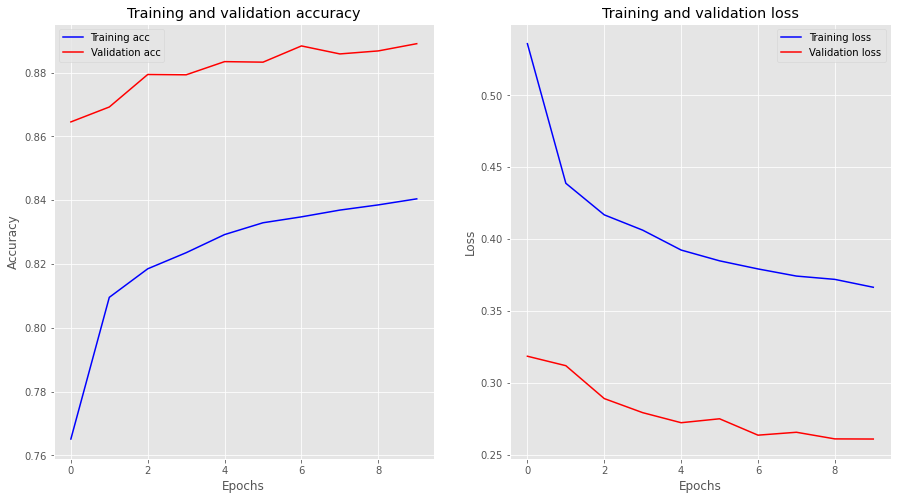

In [61]:
util.plot_accuracy_loss(history, 'BiLSTM')

# **Prediction** 

In [62]:
y_pred = model.predict(test_converted)

Confusion Matrix: 
 [[27948  5511  1645]
 [ 2012 25612   653]
 [  139   249 27889]]


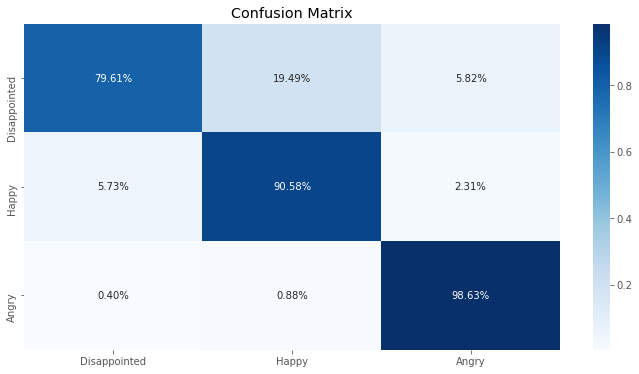

In [63]:
test, pred = util.plot_confusion_matrix(y_pred, target_converted_test, 'BiLSTM')

In [64]:
print("Classification Report: ", classification_report(test, pred))

Classification Report:                precision    recall  f1-score   support

           0       0.93      0.80      0.86     35104
           1       0.82      0.91      0.86     28277
           2       0.92      0.99      0.95     28277

    accuracy                           0.89     91658
   macro avg       0.89      0.90      0.89     91658
weighted avg       0.89      0.89      0.89     91658

